# 1. ZH C csoport - Összesen 10 pont - 90 perc áll rendelkezésre a megoldáshoz

## Azonosító adatok

- NÉV:
- NEPTUN KÓD:

## Feladatok

### 1. Feladat (1. pont)

Az alábbi ábra egy lehetséges játék eredményének állását reprezentálja egy fa struktúrában az adott játékos szempontjából. 
Sorolja fel azokat a levél elemeket amelyek Alfa-Béta vágás algoritmusát használv nem kerülnek bejárásra.

<img src=" 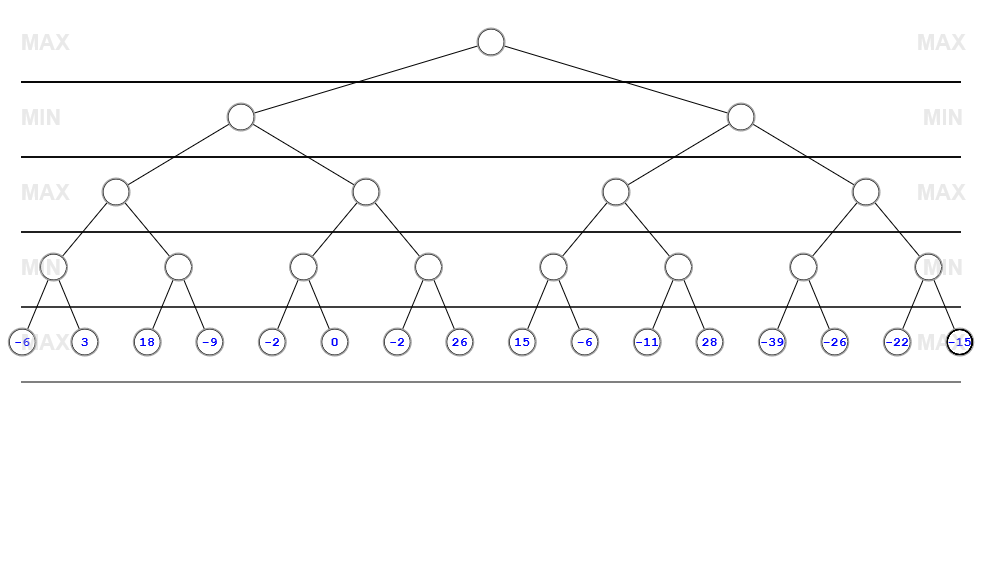" />

### 2. Feladat  (5. pont)

Készíts egy Neurális hálózatott a megadott tervrajz alapján, ami betanul a fashion_mnist adathalmazon. Kövesse a feladat instrukcióit.

#### 2. Feladat - Adatok letöltése

In [ ]:
import pandas as pd
import tensorflow_datasets as tfds
from tqdm import tqdm

In [ ]:
dataset_train = tfds.load('fashion_mnist', split='train', shuffle_files=True)
dataset_test = tfds.load('fashion_mnist', split='test', shuffle_files=True)

#### 2. Feladat - Adatok konvertálása DataFrame-be

In [ ]:
def convert_to_df(dataset):
    data = [{ 'image': item['image'].numpy(), 'label': item['label'].numpy() } for item in tqdm(dataset)]
    return pd.DataFrame(data)

df_train = convert_to_df(dataset_train)
df_test = convert_to_df(dataset_test)

In [ ]:
df_test["image"] = df_test["image"].apply(lambda x: x.flatten())
df_train["image"] = df_train["image"].apply(lambda x: x.flatten())
df_train.head()

#### 2. Feladata - Adatok vizualizálása (1. pont)

Írjon egy „víz” nevű függvényt, aminek 3 paramétere van egy test_img és test_label és size. A függvény jelenítsen meg egy véletlenül kiválasztott elemet.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def viz(test_img, test_label, size=(28, 28)):
    # ToDo
    pass

In [ ]:
choice = np.random.choice(np.arange(len(df_train)))
viz(df_train["image"].values[choice], df_train["label"].values[choice])

#### 2. Feladat - Tanuló és teszt adatok előkészítése (1. pont)
Készítsd elő egy numpy array-be az input és címke adatokat (X,y) - bontásban. Ahol X prefix az input és y prefix a címke legyen a változó nevében.

In [ ]:
X_train = None
y_train = None

X_test = None
y_test = None

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

#### 2. Feladat - One-hot enkódolja a címkéket (1. pont)

In [ ]:
def one_hot_encode():
    pass

In [ ]:
y_train = one_hot_encode(y_train, 10)
y_test = one_hot_encode(y_test, 10)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

#### 2. Feladat - Építse fel a modellt. (1.pont)

<img src="    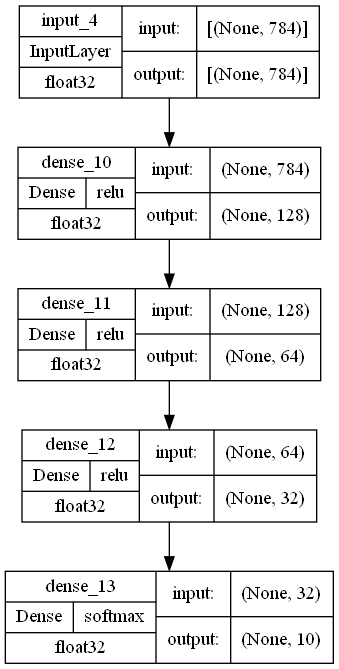" />

In [ ]:
model = None

In [ ]:
model.compile(
    optimizer="adam", 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
)

#### 2. Feladat - Tanítsa be és értékelje ki a modell a következő paraméterekkel. (1. pont)
- batch_size = 48 
- epoch = 7

In [ ]:
# Train
# ToDo

In [ ]:
# Evaluate
# ToDo

### 3. Feladat (4. pont)
Használd a Q-learning algoritmust, hogy kiképez egy ágenst ami megtalálja a laborintusban a legrövidebb utat.

#### 3. Feladat. Írd meg a Q-learning osztály action metódusát úgy a Q-learning szabályainak megfelelően. A labirintus megoldásához egy 3 dimenizós Q-táblát használt melynek dimenzióji a következő felépítésüek: (1. pont)
- 1. Sorok száma
- 2. Oszlopok száma
- 3. Cselekvések száma

In [ ]:
import random
import numpy as np

class QLearningAgent:
    """
    A Q-learning ügynökünket képviselő osztály
    """
    def __init__(self, n_states_row,  n_states_cols, n_actions, learning_rate):
        self.n_states_row = n_states_row
        self.n_states_cols = n_states_cols
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        
        self.q_table = np.zeros((self.n_states_row, self.n_states_cols, n_actions))
    
    def act(self, state_row, state_col, epsilon):
        # Generáljon véletlen számot a [0, 1] intervallumon
        random_int = random.uniform(0,1)
        action = 0
        
        # To Do
        
        return action
    
    def learn(self, state_row, state_col, action, reward, new_state_row, new_state_col, gamma):
        old_value = self.q_table[state_row][state_col][action]
        new_estimate = reward + gamma * max(self.q_table[new_state_row][new_state_col]) 
        
        self.q_table[state_row][state_col][action] = old_value + self.learning_rate * (new_estimate- old_value)

#### 3. Feladat. Írd meg a play metódust amely elvégzi a labirntus kereső osztály tanulást a Q-Learning ágenst használva (1.5 pont)

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt

class Maze():
    def __init__(self, epsilon, gamma, environment, aisles):
        self.epsilon = epsilon
        self.gamma = gamma
        self.agent = None
        self.aisles = aisles
        self.environment_rows = environment[0]
        self.environment_columns = environment[1]
        self.actions = ['up', 'right', 'down', 'left']
        self.rewards = np.full((self.environment_rows, self.environment_columns), -100.)
        self.rewards[0, 5] = 100.

        # Rewardok beállítása a folyosókhoz
        for row in range(1, self.environment_rows-1):
            for col in self.aisles[row]:
                self.rewards[row, col] = -1.
    
    def set_agent(self, agent):
        self.agent = agent

    def get_rewards(self):
        return self.rewards

    def viz(self, tabel):
        plt.imshow(tabel)
        plt.colorbar()
        plt.show()

    def viz_route(self, start_row, start_col):
        shortest_path = self.get_shortest_path(start_row, start_col)
        table = self.get_rewards().copy()
        for item in shortest_path:
            table[item[0]][item[1]] = 50
        
        self.viz(table)
        
    def is_terminal_state(self, row, col):
        """ Vég állapot vizsgálata"""
        if self.rewards[row, col] == -1.:
            return False
        else:
            return True
            
    def get_starting_location(self):
        """Nem terminális kezdőpont generálása"""
        row = np.random.randint(self.environment_rows)
        column = np.random.randint(self.environment_columns)

        # Ha terminális állapotot generálunk tovább probálkozunk
        while self.is_terminal_state(row, column):
            row = np.random.randint(self.environment_rows)
            column = np.random.randint(self.environment_columns)
        
        return row, column
    
    # define a function that will get the next location based on the chosen action
    def get_next_location(self, row, col, action):
        """Definiál egy függvényt, amely a következő helyet vissza adja a 
        kiválasztott művelet alapján"""
        new_row = row
        new_column = col
        if self.actions[action] == 'up' and row > 0:
            new_row -= 1
        elif self.actions[action] == 'right' and col < self.environment_columns - 1:
            new_column += 1
        elif self.actions[action] == 'down' and row < self.environment_rows - 1:
            new_row += 1
        elif self.actions[action] == 'left' and col > 0:
            new_column -= 1
        return new_row, new_column
  
    def get_shortest_path(self, start_row, start_column):
        """Vissza adja a legröbidebb utat"""       
        if self.is_terminal_state(start_row, start_column):
            return []
        else: 
            # Ha nem terminális a kezdő pont
            current_row, current_column = start_row, start_column
            shortest_path = []
            shortest_path.append([current_row, current_column])
            # Megyünk amíg terminálisig nem jutunk.
            while not self.is_terminal_state(current_row, current_column):
                action = np.argmax(self.agent.q_table[current_row][current_column])                
                current_row, current_column = self.get_next_location(current_row, current_column, action)
                shortest_path.append([current_row, current_column])
                
            return shortest_path

    def play(self, learning_step):
        """A tanulást végző metódus"""
        for episode in tqdm(range(learning_step)):
            new_row, new_column = self.get_starting_location()
            while not self.is_terminal_state(new_row, new_column):
                
                # To Do
                return NotImplementedError()

#### 3. Feladat - Maze osztály példányosítása

In [ ]:
# Folyosók
aisles = {}
aisles[1] = [i for i in range(1, 10)]
aisles[2] = [1, 7, 9]
aisles[3] = [i for i in range(1, 10)]
aisles[3].append(9)
aisles[4] = [1, 3, 7, 9]
aisles[5] = [i for i in range(11)]
aisles[6] = [5]
aisles[7] = [i for i in range(1, 10)]
aisles[8] = [3, 7]
aisles[9] = [i for i in range(8)]

In [ ]:
maze = Maze(epsilon = 0.9, gamma = 0.9, environment=(11,11), aisles = aisles)

In [ ]:
maze.viz(maze.get_rewards())

#### 3. Feladat - Q-Learning Ágens példányosítása

In [ ]:
agent = QLearningAgent(
    n_states_row=11, 
    n_states_cols=11, 
    n_actions=len(maze.actions), 
    learning_rate=0.9)

maze.set_agent(agent)

agent.q_table[0][0]

#### 3. Feladat - Tanítsd be az Ágenst 10000 lépessel (1. pont)

In [ ]:
# To Do

#### 3. Feladat - Vizualizáld a megadott kezdőponttal a tanulás eredményét (0.5. pont)

In [ ]:
maze.viz_route(6, 5)